In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

# To read a CSV file:
import pandas as pd
df = pd.read_csv(next(iter(uploaded)))
df.head()

Saving Foodpanda Analysis Dataset.csv to Foodpanda Analysis Dataset.csv


,customer_id,gender,age,city,signup_date,order_id,order_date,restaurant_name,dish_name,category,quantity,price,payment_method,order_frequency,last_order_date,loyalty_points,churned,rating,rating_date,delivery_status
0,C5663,Male,Adult,Peshawar,1/14/2024,O9663,8/23/2023,McDonald's,Burger,Italian,5,1478.27,Cash,38,7/19/2025,238,Active,3,10/14/2024,Cancelled
1,C2831,Male,Adult,Multan,7/7/2024,O6831,8/23/2023,KFC,Burger,Italian,3,956.04,Wallet,24,11/25/2024,81,Active,2,8/21/2025,Delayed
2,C2851,Other,Senior,Multan,6/20/2025,O6851,8/23/2023,Pizza Hut,Fries,Italian,2,882.51,Cash,42,5/10/2025,82,Inactive,3,9/19/2024,Delayed
3,C1694,Female,Senior,Peshawar,9/5/2023,O5694,8/23/2023,Subway,Pizza,Dessert,4,231.30,Card,27,7/24/2025,45,Inactive,2,6/29/2025,Delayed
4,C4339,Other,Senior,Lahore,12/29/2023,O8339,8/24/2023,KFC,Sandwich,Dessert,1,1156.69,Cash,35,12/21/2024,418,Inactive,3,3/6/2025,Cancelled


In [4]:
# Basic info
print("Columns:", list(df.columns))
print("\nShape:", df.shape)
display(df.head())
display(df.info())

Columns: ['customer_id', 'gender', 'age', 'city', 'signup_date', 'order_id', 'order_date', 'restaurant_name', 'dish_name', 'category', 'quantity', 'price', 'payment_method', 'order_frequency', 'last_order_date', 'loyalty_points', 'churned', 'rating', 'rating_date', 'delivery_status']

Shape: (6000, 20)


,customer_id,gender,age,city,signup_date,order_id,order_date,restaurant_name,dish_name,category,quantity,price,payment_method,order_frequency,last_order_date,loyalty_points,churned,rating,rating_date,delivery_status
0,C5663,Male,Adult,Peshawar,1/14/2024,O9663,8/23/2023,McDonald's,Burger,Italian,5,1478.27,Cash,38,7/19/2025,238,Active,3,10/14/2024,Cancelled
1,C2831,Male,Adult,Multan,7/7/2024,O6831,8/23/2023,KFC,Burger,Italian,3,956.04,Wallet,24,11/25/2024,81,Active,2,8/21/2025,Delayed
2,C2851,Other,Senior,Multan,6/20/2025,O6851,8/23/2023,Pizza Hut,Fries,Italian,2,882.51,Cash,42,5/10/2025,82,Inactive,3,9/19/2024,Delayed
3,C1694,Female,Senior,Peshawar,9/5/2023,O5694,8/23/2023,Subway,Pizza,Dessert,4,231.30,Card,27,7/24/2025,45,Inactive,2,6/29/2025,Delayed
4,C4339,Other,Senior,Lahore,12/29/2023,O8339,8/24/2023,KFC,Sandwich,Dessert,1,1156.69,Cash,35,12/21/2024,418,Inactive,3,3/6/2025,Cancelled


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      6000 non-null   object 
 1   gender           6000 non-null   object 
 2   age              6000 non-null   object 
 3   city             6000 non-null   object 
 4   signup_date      6000 non-null   object 
 5   order_id         6000 non-null   object 
 6   order_date       6000 non-null   object 
 7   restaurant_name  6000 non-null   object 
 8   dish_name        6000 non-null   object 
 9   category         6000 non-null   object 
 10  quantity         6000 non-null   int64  
 11  price            6000 non-null   float64
 12  payment_method   6000 non-null   object 
 13  order_frequency  6000 non-null   int64  
 14  last_order_date  6000 non-null   object 
 15  loyalty_points   6000 non-null   int64  
 16  churned          6000 non-null   object 
 17  rating        

None

In [5]:
# Missing values & duplicates
print("\nMissing values per column:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())

# A quick value_counts for categorical-ish columns (top 10)
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"\nTop values for {col}:")
        print(df[col].value_counts().head(10))


Missing values per column:
 customer_id        0
gender             0
age                0
city               0
signup_date        0
order_id           0
order_date         0
restaurant_name    0
dish_name          0
category           0
quantity           0
price              0
payment_method     0
order_frequency    0
last_order_date    0
loyalty_points     0
churned            0
rating             0
rating_date        0
delivery_status    0
dtype: int64

Duplicate rows: 0

Top values for customer_id:
customer_id
C4870    1
C1955    1
C1450    1
C4726    1
C4417    1
C4936    1
C1156    1
C4254    1
C1274    1
C1650    1
Name: count, dtype: int64

Top values for gender:
gender
Female    2018
Male      2017
Other     1965
Name: count, dtype: int64

Top values for age:
age
Teenager    2062
Adult       1984
Senior      1954
Name: count, dtype: int64

Top values for city:
city
Multan       1256
Lahore       1217
Peshawar     1195
Islamabad    1187
Karachi      1145
Name: count, dtype: i

In [9]:
# Convert date columns to datetime objects
date_cols = ['signup_date', 'order_date', 'last_order_date', 'rating_date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

df.describe(include='all')

,customer_id,gender,age,city,signup_date,order_id,order_date,restaurant_name,dish_name,category,quantity,price,payment_method,order_frequency,last_order_date,loyalty_points,churned,rating,rating_date,delivery_status
count,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000.000000,6000.000000,6000,6000.000000,6000,6000.000000,6000,6000.000000,6000,6000
unique,6000,3,3,5,NaN,6000,NaN,5,5,5,NaN,NaN,3,NaN,NaN,NaN,2,NaN,NaN,3
top,C4870,Female,Teenager,Multan,NaN,O8870,NaN,Subway,Pasta,Italian,NaN,NaN,Cash,NaN,NaN,NaN,Active,NaN,NaN,Delivered
freq,1,2018,2062,1256,NaN,1,NaN,1260,1262,1236,NaN,NaN,2039,NaN,NaN,NaN,3016,NaN,NaN,2060
mean,NaN,NaN,NaN,NaN,2024-08-19 12:06:43.199999744,NaN,2024-08-20 06:37:55.199999744,NaN,NaN,NaN,2.991667,800.524880,NaN,25.304667,2025-02-20 07:55:55.200000,250.173667,NaN,2.996833,2025-02-18 12:47:59.999999744,NaN
min,NaN,NaN,NaN,NaN,2023-08-22 00:00:00,NaN,2023-08-23 00:00:00,NaN,NaN,NaN,1.000000,100.300000,NaN,1.000000,2024-08-21 00:00:00,0.000000,NaN,1.000000,2024-08-21 00:00:00,NaN
25%,NaN,NaN,NaN,NaN,2024-02-21 00:00:00,NaN,2024-02-21 00:00:00,NaN,NaN,NaN,2.000000,441.997500,NaN,13.000000,2024-11-21 00:00:00,125.000000,NaN,2.000000,2024-11-18 00:00:00,NaN
50%,NaN,NaN,NaN,NaN,2024-08-15 00:00:00,NaN,2024-08-22 00:00:00,NaN,NaN,NaN,3.000000,806.460000,NaN,25.000000,2025-02-20 00:00:00,249.500000,NaN,3.000000,2025-02-19 00:00:00,NaN
75%,NaN,NaN,NaN,NaN,2025-02-20 00:00:00,NaN,2025-02-18 00:00:00,NaN,NaN,NaN,4.000000,1149.737500,NaN,37.000000,2025-05-24 00:00:00,378.000000,NaN,4.000000,2025-05-22 00:00:00,NaN
max,NaN,NaN,NaN,NaN,2025-08-21 00:00:00,NaN,2025-08-22 00:00:00,NaN,NaN,NaN,5.000000,1499.950000,NaN,50.000000,2025-08-21 00:00:00,500.000000,NaN,5.000000,2025-08-21 00:00:00,NaN


/tmp/ipython-input-3083700701.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_dishes.values, y=top_dishes.index, palette='viridis')


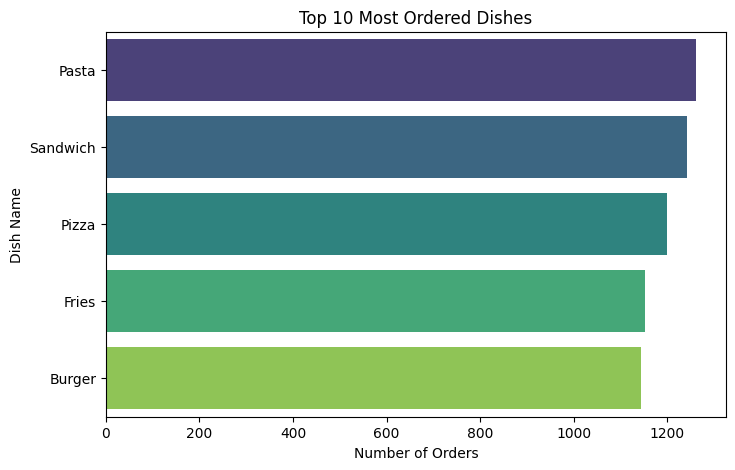

In [15]:
# Top items bar chart using the available 'dish_name' column
top_dishes = df['dish_name'].value_counts().head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_dishes.values, y=top_dishes.index, palette='viridis')
plt.title('Top 10 Most Ordered Dishes')
plt.xlabel('Number of Orders')
plt.ylabel('Dish Name')
plt.show()

In [23]:
# 1) Peak days and hours
# Need to extract day of week and hour from order_date first
df['order_dayname'] = df['order_date'].dt.day_name()
df['order_hour'] = df['order_date'].dt.hour

print("Orders per day of week:\n", df['order_dayname'].value_counts())
print("\nOrders per hour:\n", df['order_hour'].value_counts().sort_index())

# 2) Top customers by spend
if 'customer_id' in df.columns and 'price' in df.columns:
    cust = df.groupby('customer_id')['price'].sum().sort_values(ascending=False).head(10)
    print("\nTop customers by total spend:\n", cust)

Orders per day of week:
 order_dayname
Monday       892
Friday       878
Sunday       877
Saturday     864
Thursday     864
Tuesday      813
Wednesday    812
Name: count, dtype: int64

Orders per hour:
 order_hour
0    6000
Name: count, dtype: int64

Top customers by total spend:
 customer_id
C1227    1499.95
C5781    1499.73
C5825    1499.68
C4114    1499.59
C3134    1499.37
C3960    1499.03
C2515    1499.01
C3337    1498.99
C6021    1498.93
C5766    1498.79
Name: price, dtype: float64
